Name - H.M.P.Siriwardana

Index- 190595J

Assignment_01

1)

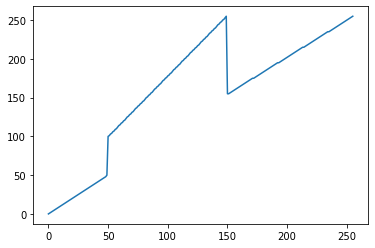

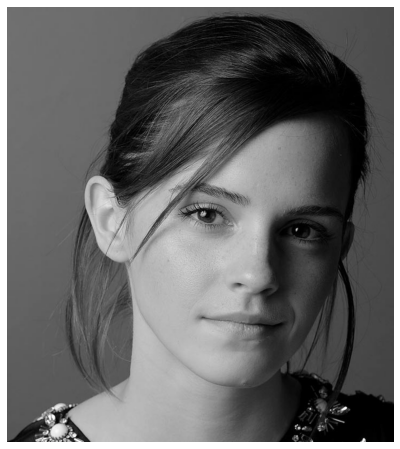

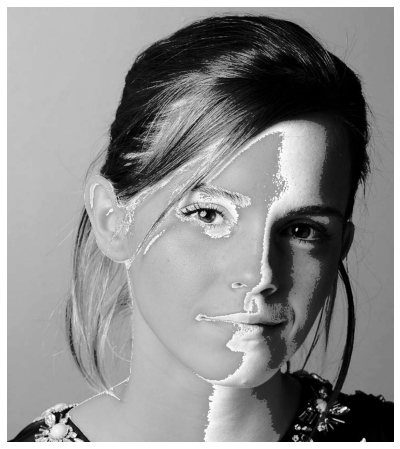

In [29]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

 
img =cv.imread(r'./Images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(155,255,106)


t = np.concatenate((t1,t2,t3),axis = 0).astype(np.uint8)

g = cv.LUT(img,t)

fig, ax = plt.subplots()
ax.plot(t)


cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
implot = plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
implot = plt.imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

2)

White Matter

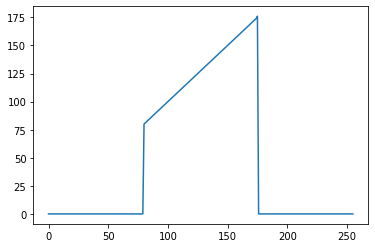

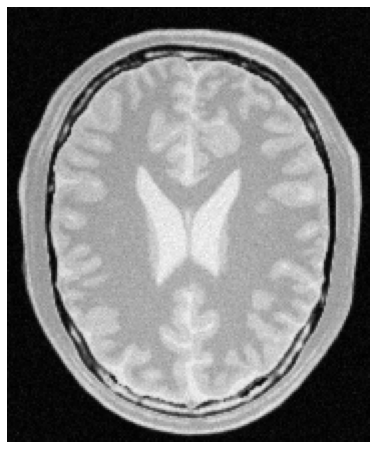

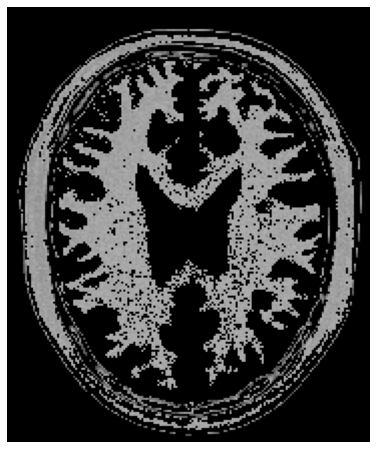

In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

 
img =cv.imread(r'./Images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,0,80)
t2 = np.linspace(80,176,96)
t3 = np.linspace(0,0,80)


t = np.concatenate((t1,t2,t3 ),axis = 0).astype(np.uint8)

g = cv.LUT(img,t)

fig, ax = plt.subplots()
ax.plot(t)


cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
implot = plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
implot = plt.imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Grey Matter

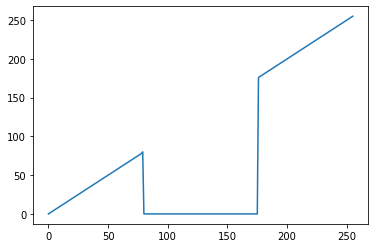

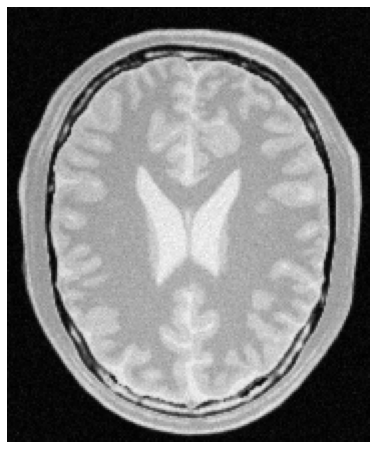

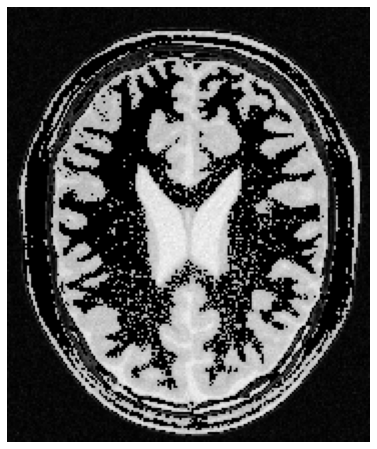

In [31]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

 
img =cv.imread(r'./Images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,80,80)
t2 = np.linspace(0,0,96)
t3 = np.linspace(176,255,80)


t = np.concatenate((t1,t2,t3 ),axis = 0).astype(np.uint8)

g = cv.LUT(img,t)

fig, ax = plt.subplots()
ax.plot(t)


cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
implot = plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
implot = plt.imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

3.


In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

 
img =cv.imread(r'./Images/highlights_and_shadows.jpg')
assert img is not None

c_img = cv.cvtColor(img,cv.COLOR_BGR2LAB)
(L,A,B)= cv.split(c_img)


gamma= 2
t = np.array([((p/255)**gamma)*255 for p in range (0,256)]).astype(np.uint8)
gammaImg = cv.LUT(L,t)

merge_img = cv.merge([gammaImg,A,B])
merge_img_bgr =cv.cvtColor(img,cv.COLOR_LAB2BGR)


cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.imshow('Image',gammaImg)
cv.waitKey(0) 
cv.imshow('Image',merge_img)
cv.waitKey(0) 
cv.destroyAllWindows()

[[13 13 13 ... 36 36 33]
 [13 13 13 ... 35 35 31]
 [13 13 13 ... 29 29 26]
 ...
 [19 13 13 ... 58 56 56]
 [20 15 13 ... 56 56 53]
 [22 18 13 ... 55 55 49]]


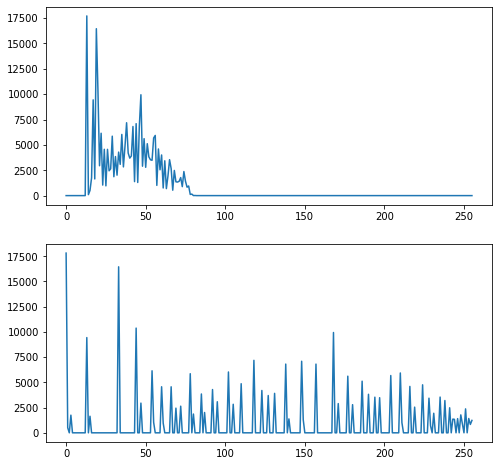

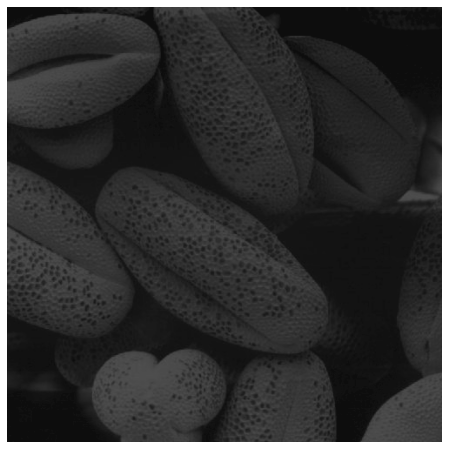

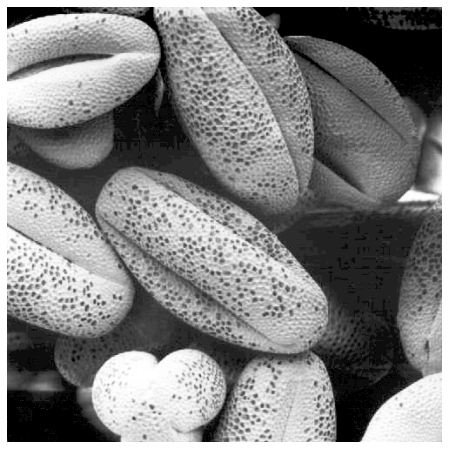

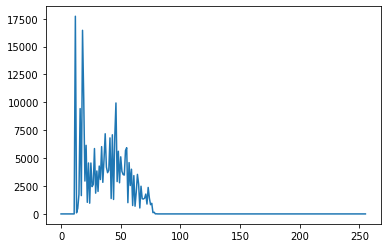

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

 
img =cv.imread(r'./images/shells.png',cv.IMREAD_GRAYSCALE)
assert img is not None
print((img))

Eqimg = cv.equalizeHist(img)

hist_g = cv.calcHist([Eqimg],[0],None,[256],[0,256])
hist_f = cv.calcHist([img],[0],None,[256],[0,256])

fig, ax = plt.subplots(2,1,figsize = (8,8))
ax[0].plot(hist_f)
ax[1].plot(hist_g)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.imshow('Image',Eqimg)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
implot = plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
implot = plt.imshow(cv.cvtColor(Eqimg, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

def hist_img(img):
    zlist = [0]*256
    for i in range(0,len(img)):
        for j in range (0,len(img[i])):
            zlist[img[i][j]]+=1
    return zlist


""" 
hist = hist_img(img-1)

def equal_hist_img(limg,m,n,L):
    for k in range (0,(len(limg)):
        limg[k+1] = limg[k+1]+limg[k]
        limg[k] = ((L-1)*limg[k])/(m*n)
    
    return limg """
        
    
# eq_hist = equal_hist_img(img,500,500,255)
plt.plot(hist)
# plt.plot(eq_hist)


6)

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f =cv.imread(r'./images/einstein.png',cv.IMREAD_GRAYSCALE)
assert f is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
f_x = cv.filter2D(f, -1, sobel_v )

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float32)
f_y = cv.filter2D(f, -1, sobel_h )

def sobel_filt (img,sobel):
    padding = 1
    padded_img = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
    padded_img[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = img
    k = len(img)
    for  k in range (0,len(img)):
        img[k] = [0] + img[k]
        img[k] = img[k].append(0)
    n= len(img[0])
    zero_ud = [0]*n
    img = zero_ud + img
    img = img +zero_ud
    return img


sf = sobel_filt(f,sobel_h)





fig,ax = plt.subplots (1,3,figsize = (18,6))
ax[0].imshow(f,cmap='gray',vmin = 0 ,vmax = 255)
ax[0].set_title('Orginal')
ax[1].imshow(f_x,cmap='gray',vmin = -1020 ,vmax =1020)
ax[1].set_title(r'Sobel Vertical $f_x$')
ax[2].imshow(f_y,cmap='gray',vmin = -1020 ,vmax =1020)
ax[2].set_title(r'Sobel Horizontal $f_x$')

print(f[0])
print(sf[0])

for i in range(3):
    ax[i].axis('off')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'append'